<a href="https://colab.research.google.com/github/KAlikhanov/cost_of_data_comparison/blob/main/comparison_visualized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
fileurl = 'https://query.data.world/s/glcvohoyomb6tdyehtvprmd7cohb6z'
df = pd.read_excel(fileurl)
df.head()

,Rank,Country,Avg Price of 1GB (USD)
0,1,India,0.09
1,2,Israel,0.11
2,3,Kyrgyzstan,0.21
3,4,Italy,0.43
4,5,Ukraine,0.46


<img src = https://media.data.world/ziDtA7B9QyCypYZySfEn_image.png>

In [132]:
# Making sure that all the dtypes and information checks out.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    155 non-null    int64  
 1   Country                 155 non-null    object 
 2   Avg Price of 1GB (USD)  155 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.8+ KB


In [133]:
# I create two seperate filters for my top and bottom dataframes that I will be
# creating.
top = df['Rank'] <= 20
bottom = df['Rank'] >= 135

In [134]:
# This df contains the 20 cheapest countries.
top_df = df.loc[top,:]

In [135]:
# This df contains the 20 most expensive countries.
bottom_df = df.loc[bottom,:]

In [136]:
# I create a df that combines the two, it will be useful for my visualization.
top_bottom = top_df.append(bottom_df)

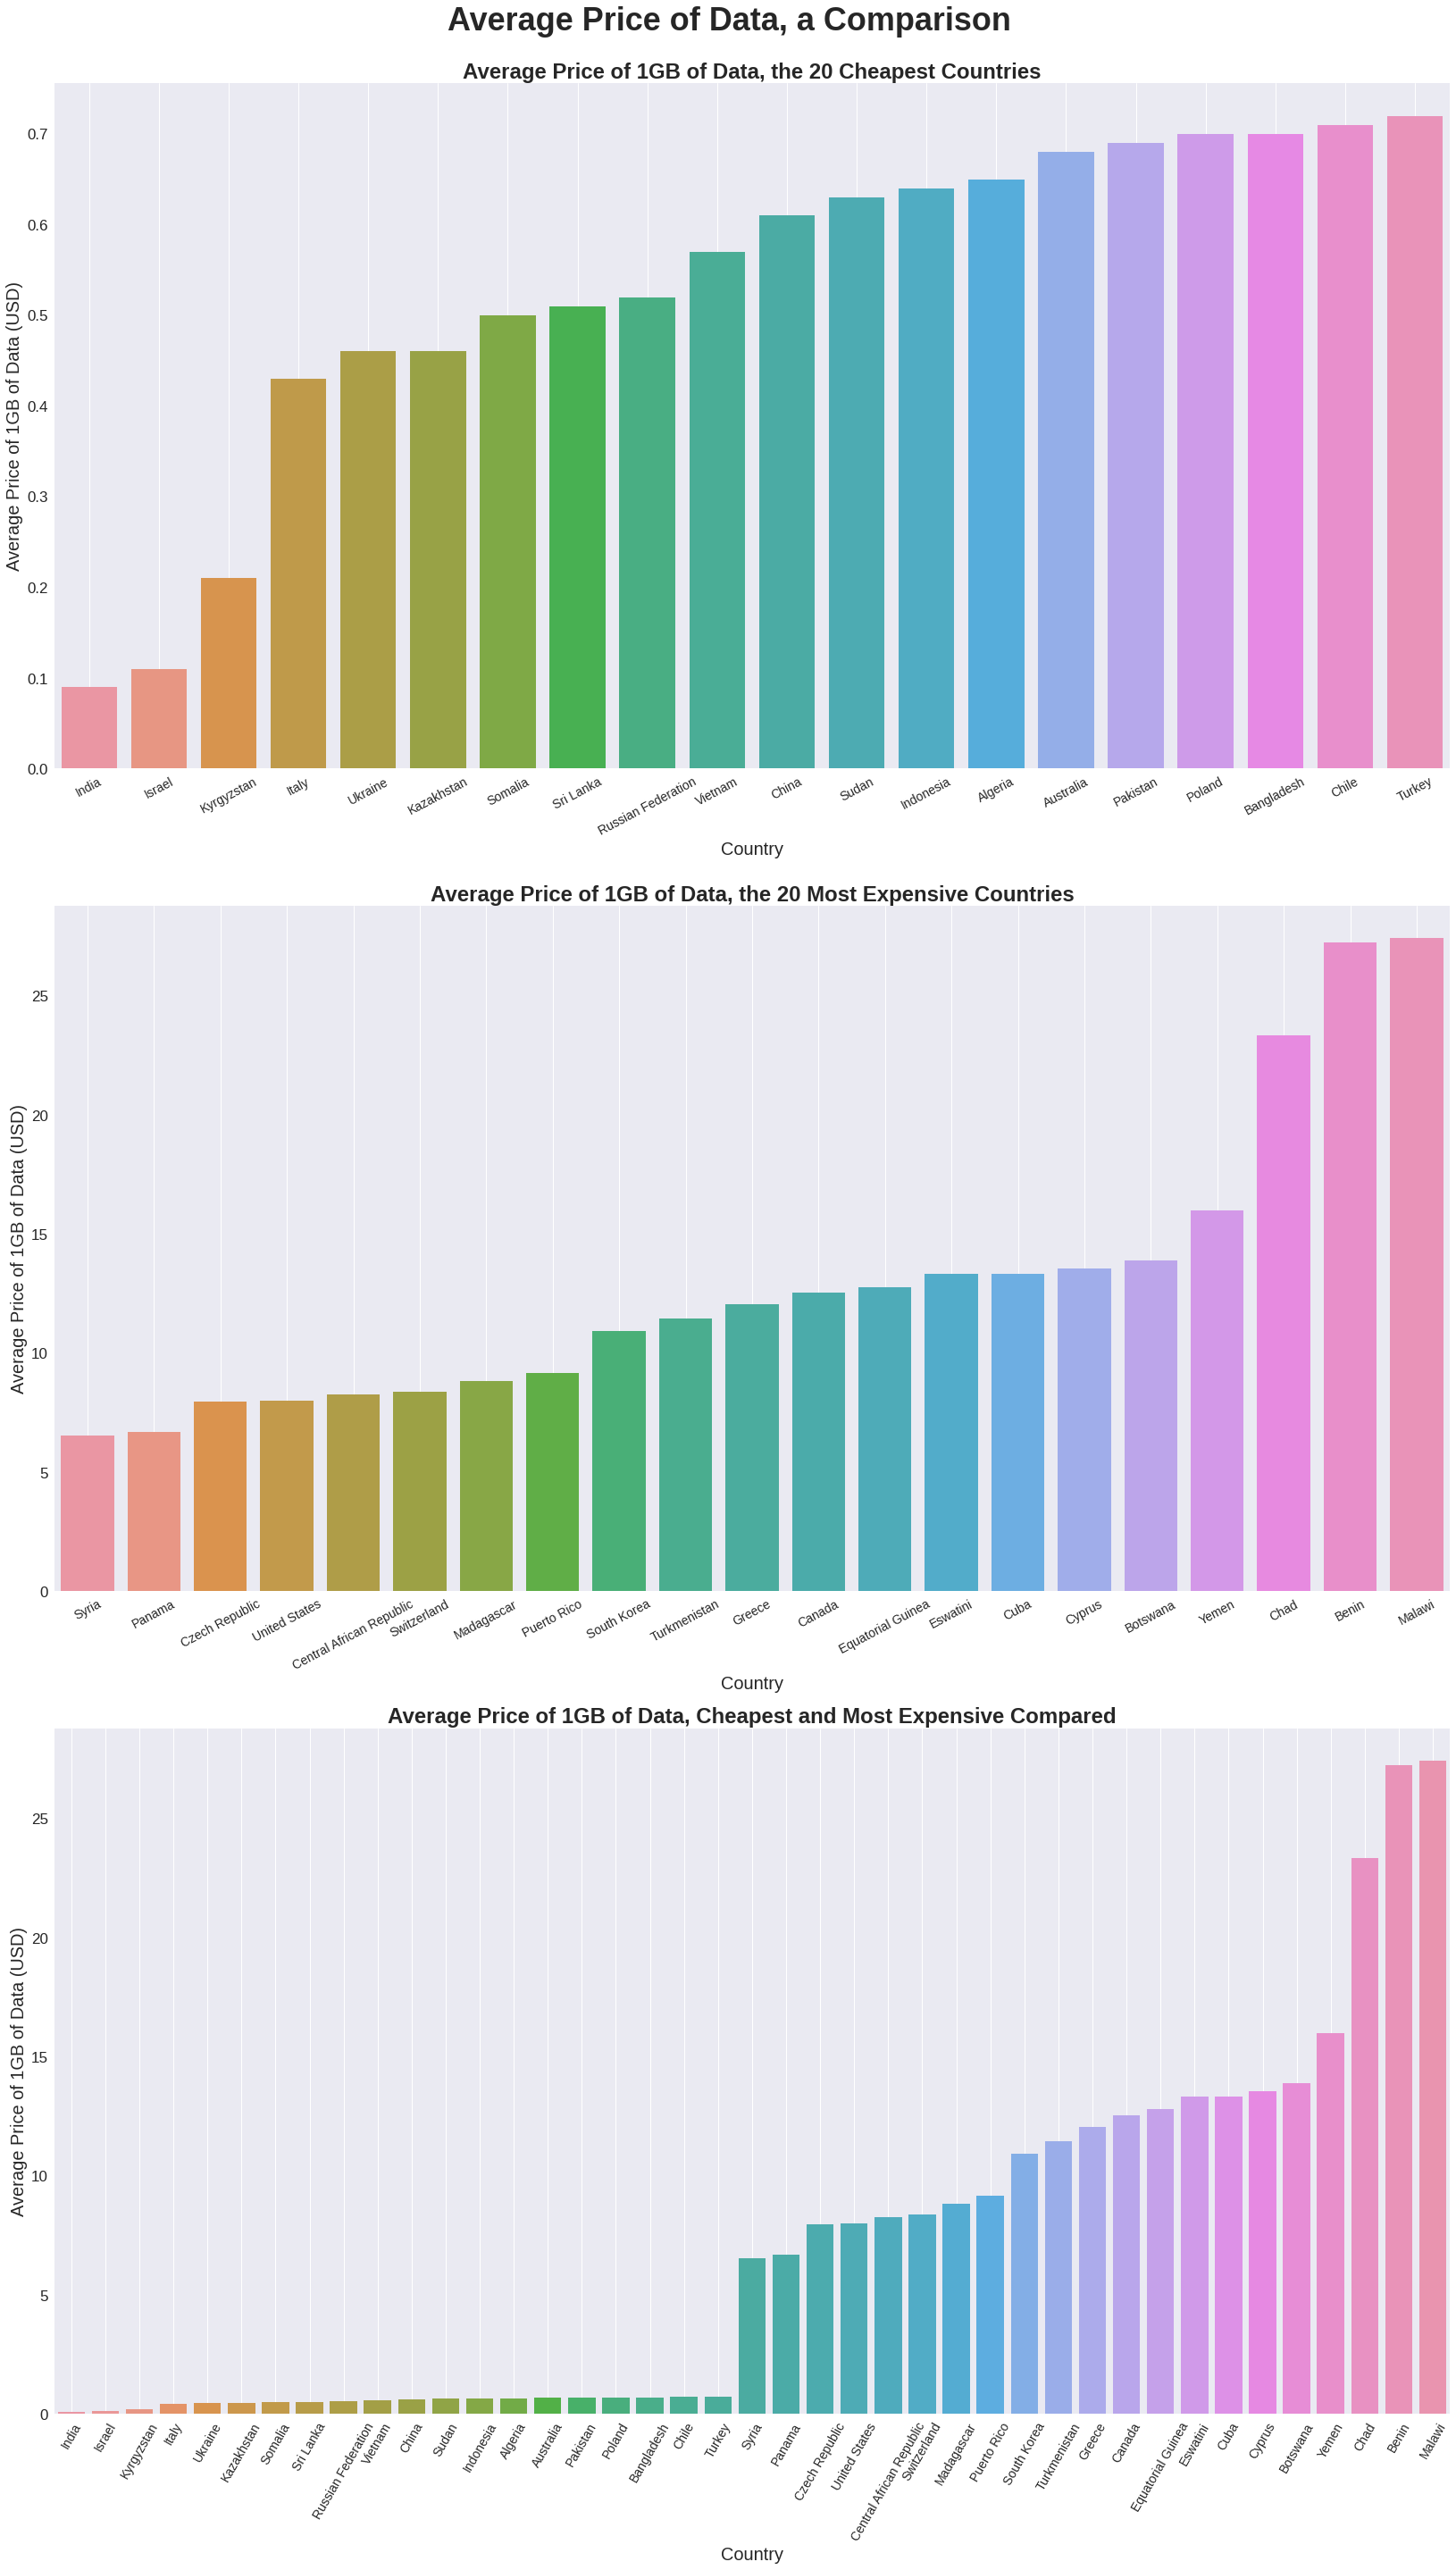

In [137]:
# I decide to split the visualization into three graphs. One for cheapest, one
# for most expensive, and one comparing the two.
plt.style.use('seaborn')
fig, axes = plt.subplots(nrows = 3, figsize = (28,48))
sns.barplot(data=top_df, x = 'Country', y = 'Avg Price of 1GB (USD)', ax=axes[0]);
axes[0].tick_params(axis='x', labelrotation=28, labelleft=True, labelsize = 14)
axes[0].tick_params(axis='y', labelsize = 17)
axes[0].set_title('Average Price of 1GB of Data, the 20 Cheapest Countries', fontsize = 24, fontweight = 'bold')
axes[0].set_xlabel('Country', fontsize = 20)
axes[0].set_ylabel('Average Price of 1GB of Data (USD)', fontsize =20)

sns.barplot(data=bottom_df, x = 'Country', y = 'Avg Price of 1GB (USD)', ax=axes[1]);
axes[1].tick_params(axis='x', labelrotation=28, labelleft=True, labelsize = 14)
axes[1].tick_params(axis='y', labelsize = 17)
axes[1].set_title('Average Price of 1GB of Data, the 20 Most Expensive Countries', fontsize = 24, fontweight = 'bold')
axes[1].set_xlabel('Country', fontsize = 20)
axes[1].set_ylabel('Average Price of 1GB of Data (USD)', fontsize =20)

sns.barplot(data=top_bottom, x = 'Country', y = 'Avg Price of 1GB (USD)', ax=axes[2]);
axes[2].tick_params(axis='x', labelrotation=60, labelleft=True, labelsize = 14)
axes[2].tick_params(axis='y', labelsize = 17)
axes[2].set_title('Average Price of 1GB of Data, Cheapest and Most Expensive Compared', fontsize = 24, fontweight = 'bold')
axes[2].set_xlabel('Country', fontsize = 20)
axes[2].set_ylabel('Average Price of 1GB of Data (USD)', fontsize =20)

fig.suptitle('Average Price of Data, a Comparison', fontsize = 36, fontweight = 'bold', y = .905)
[ax.grid() for ax in axes];

In [138]:
# This is for visual purposes below.
top_df.set_index('Rank', inplace=True)
bottom_df.set_index('Rank', inplace=True)

In [139]:
# There is some information on the visualization that I am attempting to improve
# I don't want to exclude that information but I am unsure how to just add it
# onto my graph so I include the info below.

# Top 5 Cheapest Countries.
# The low cost of data in India can be attributed to the intense market
# competition of the country.
top_df.head()

,Country,Avg Price of 1GB (USD)
Rank,,
1,India,0.09
2,Israel,0.11
3,Kyrgyzstan,0.21
4,Italy,0.43
5,Ukraine,0.46


In [140]:
# # Top 5 Most Expensive Countries.
# Chad, Benin, and Malawi are all in Africa.
# The price difference between the cheapest and most expensive is ~30,000%.
bottom_df.tail()

,Country,Avg Price of 1GB (USD)
Rank,,
151,Botswana,13.87
152,Yemen,15.98
153,Chad,23.33
154,Benin,27.22
155,Malawi,27.41
